## Pandas Deep Dive - Finding Outliers in Shipping Data

In this lab, we'll analyze the lb / unit ratio for different products. We want to look for any outliers in the data, where shipments are abnormally heavy or light.

In [3]:
### Loading in libraries

import pandas as pd
import numpy as np

## Part A (10 pts)

In [9]:
'''
a) There is a file called 'Supply chain logisitcs problem.xlsx'. 
Read in the file as a datafrane and store it into a variable called "orders"
'''

# your code here
orders = pd.read_excel("Supply chain logisitcs problem.xlsx")

In [10]:
orders.head()

,Order ID,Order Date,Product ID,Destination Port,Unit quantity,Weight
0,782912,2019-12-31,1700106,PORT09,808,14.30
1,782913,2019-12-31,1700106,PORT09,3188,87.94
2,782914,2019-12-31,1700106,PORT09,2331,61.20
3,782915,2019-12-31,1700106,PORT09,847,16.16
4,782916,2019-12-31,1700106,PORT09,2163,52.34


In [ ]:
'''
End of Section
'''

## Part B (10 pts)

In [11]:
'''
b) Next, we'll create a column for the lb / unit ratio for each product. Create this column in the orders dataframe
and call it 'lb/unit_ratio'.
'''

# your code here
orders['lb/unit_ratio'] = orders['Weight']/orders['Unit quantity']

In [12]:
orders

,Order ID,Order Date,Product ID,Destination Port,Unit quantity,Weight,lb/unit_ratio
0,782912,2019-12-31,1700106,PORT09,808,14.300000,0.017698
1,782913,2019-12-31,1700106,PORT09,3188,87.940000,0.027585
2,782914,2019-12-31,1700106,PORT09,2331,61.200000,0.026255
3,782915,2019-12-31,1700106,PORT09,847,16.160000,0.019079
4,782916,2019-12-31,1700106,PORT09,2163,52.340000,0.024198
...,...,...,...,...,...,...,...
9210,792122,2019-12-31,1683388,PORT09,339,2.354118,0.006944
9211,792123,2019-12-31,1683388,PORT09,339,2.354118,0.006944
9212,792124,2019-12-31,1683388,PORT09,245,0.294265,0.001201
9213,792125,2019-12-31,1683430,PORT09,278,2.480000,0.008921


In [ ]:
'''
End of Section
'''

## Part C (35 pts)

In [13]:
'''
c) Next, we need to get the mean lb / unit ratio for each product. For easy comparision, broadcast this result back into
the original 'orders' dataframe. Your new column in the orders dataframe should be called 'avg_product_lb/unit_ratio'.
Hint: There are multiple ways to do this, but the easiest is with the transform method.
'''

# your code here
# Calculate the mean lb/unit ratio for each product
avg_product_lb_unit_ratio = orders.groupby('Product ID')['lb/unit_ratio'].mean()

# Broadcast the mean back to the original DataFrame
orders['avg_product_lb/unit_ratio'] = orders['Product ID'].transform(lambda x: avg_product_lb_unit_ratio[x])

In [14]:
orders

,Order ID,Order Date,Product ID,Destination Port,Unit quantity,Weight,lb/unit_ratio,avg_product_lb/unit_ratio
0,782912,2019-12-31,1700106,PORT09,808,14.300000,0.017698,0.022385
1,782913,2019-12-31,1700106,PORT09,3188,87.940000,0.027585,0.022385
2,782914,2019-12-31,1700106,PORT09,2331,61.200000,0.026255,0.022385
3,782915,2019-12-31,1700106,PORT09,847,16.160000,0.019079,0.022385
4,782916,2019-12-31,1700106,PORT09,2163,52.340000,0.024198,0.022385
...,...,...,...,...,...,...,...,...
9210,792122,2019-12-31,1683388,PORT09,339,2.354118,0.006944,0.006204
9211,792123,2019-12-31,1683388,PORT09,339,2.354118,0.006944,0.006204
9212,792124,2019-12-31,1683388,PORT09,245,0.294265,0.001201,0.006204
9213,792125,2019-12-31,1683430,PORT09,278,2.480000,0.008921,0.008921


In [ ]:
'''
End of Section
'''

## Part D (10 pts)

In [15]:
'''
d) To look for outliers, let's analyze the squared difference between the 'lb/unit_ratio' and 'avg_product_lb/unit_ratio' columns within each row.
Create a new column in the orders dataframe called 'lb/unit_squared_diff' with the stored result.
Hint: Use the np.square() function.
'''

# your code here
orders['lb/unit_squared_diff'] = np.square(orders['lb/unit_ratio'] - orders['avg_product_lb/unit_ratio'])

In [16]:
orders

,Order ID,Order Date,Product ID,Destination Port,Unit quantity,Weight,lb/unit_ratio,avg_product_lb/unit_ratio,lb/unit_squared_diff
0,782912,2019-12-31,1700106,PORT09,808,14.300000,0.017698,0.022385,2.196483e-05
1,782913,2019-12-31,1700106,PORT09,3188,87.940000,0.027585,0.022385,2.704008e-05
2,782914,2019-12-31,1700106,PORT09,2331,61.200000,0.026255,0.022385,1.497799e-05
3,782915,2019-12-31,1700106,PORT09,847,16.160000,0.019079,0.022385,1.092687e-05
4,782916,2019-12-31,1700106,PORT09,2163,52.340000,0.024198,0.022385,3.287653e-06
...,...,...,...,...,...,...,...,...,...
9210,792122,2019-12-31,1683388,PORT09,339,2.354118,0.006944,0.006204,5.475113e-07
9211,792123,2019-12-31,1683388,PORT09,339,2.354118,0.006944,0.006204,5.475113e-07
9212,792124,2019-12-31,1683388,PORT09,245,0.294265,0.001201,0.006204,2.503280e-05
9213,792125,2019-12-31,1683430,PORT09,278,2.480000,0.008921,0.008921,0.000000e+00


In [ ]:
'''
End of Section
'''

## Part E (10 pts)

In [17]:
'''
e) Let's sort the orders by our new 'lb/unit_squared_diff' columns.
Create a new dataframe called 'outliers' to store the 10 orders with the highest lb/unit
deviations from the product mean.
Hint: Pay attention to the 'ascending keyword' if using the sort_values function.
'''

# your code here
# Sort the orders by 'lb/unit_squared_diff' in descending order
outliers = orders.sort_values('lb/unit_squared_diff', ascending=False)

# Select the top 10 orders with the highest deviations
outliers = outliers.head(10)

In [18]:
outliers

,Order ID,Order Date,Product ID,Destination Port,Unit quantity,Weight,lb/unit_ratio,avg_product_lb/unit_ratio,lb/unit_squared_diff
883,783795,2019-12-31,1686435,PORT09,304,527.534472,1.735311,4.378774,6.987899
884,783796,2019-12-31,1686435,PORT09,333,2338.405126,7.022238,4.378774,6.987899
886,783798,2019-12-31,1696533,PORT09,318,360.800000,1.134591,1.579998,0.198387
885,783797,2019-12-31,1696533,PORT09,370,749.400000,2.025405,1.579998,0.198387
7187,790099,2019-12-31,1680245,PORT09,374,152.637681,0.408122,0.102679,0.093296
959,783871,2019-12-31,1682594,PORT09,692,282.965517,0.408910,0.157194,0.063361
1034,783946,2019-12-31,1666994,PORT09,742,268.536589,0.361909,0.180817,0.032794
1037,783949,2019-12-31,1666994,PORT09,286,0.554800,0.001940,0.180817,0.031997
1040,783952,2019-12-31,1666994,PORT09,260,0.554800,0.002134,0.180817,0.031928
894,783806,2019-12-31,1666994,PORT09,318,1.109599,0.003489,0.180817,0.031445


In [ ]:
'''
End of Section
'''

## Extra Credit: Part F (1 pts)

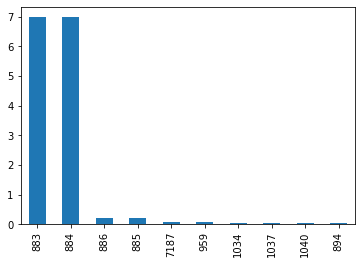

In [21]:
'''
f) Extra Credit: Let's plot our outliers in a bar chart. The y-axis should be our new 'lb/unit_squared_diff' column.
The x-axis can be the default index.
'''

# your code here
# Create a bar chart of the outliers
outliers['lb/unit_squared_diff'].plot(kind = 'bar')

In [ ]:
'''
End of Section
'''